In [1]:
setwd('/data/import/project1/momo-6.12.0.199/runtime/PIPELINE/taxonkit1/a.ji/data2/')

In [2]:
load('sample74.model.gene.rda')

In [3]:
head(da2,2)

,sample,FAM200B,BCL2A1,IGJ,TXN
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,C10,4.886505,22.32717,21.40125,7.655688
2,C11,6.201921,32.12134,21.30293,17.794071


In [4]:
cli74 = read.table('./sample74.cli.txt',header =T,sep = '\t') %>% dplyr::filter(group == 'CI')

In [46]:
da2 = da2 %>% dplyr::filter(sample %in% cli74$sample)

In [47]:
dim(da2)

[1] 42  5

In [48]:
head(cli74,4)

,group,sample,gender,SBP,DBP,age,BMI,Hb,RBC,WBC,...,UA,GLU,TG,TC,HDL.c,LDL.C,ApoA,ApoB,LP,HCY
,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,...,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1,CI,CI2,1,NA,NA,52,43.02772,164,5.16,6.79,...,226,4.9,2.2,4.59,1.52,1.98,1.55,0.70,NA,11.4
2,CI,CI3,1,NA,NA,61,51.90311,NA,NA,NA,...,264,4.3,1.0,3.57,0.90,1.80,0.98,0.62,NA,14.7
3,CI,CI4,2,140,90,51,28.51562,119,4.11,9.91,...,175,7.2,1.7,6.58,1.21,3.75,1.25,1.19,NA,10.0
4,CI,CI5,1,NA,NA,63,27.54821,123,4.11,4.35,...,320,9.4,1.3,3.25,0.79,1.50,1.03,0.61,NA,10.6


In [49]:
library(dplyr)

In [50]:
input = merge(da2,cli74,by.x= 'sample',by.y = 'sample') %>%  tibble::remove_rownames() %>% tibble::column_to_rownames(.,'sample') %>%
t() %>%   as.data.frame()

In [51]:
gene = input[1:4,] %>% t() %>%  as.data.frame()

In [52]:
rownames(input)

[1] "FAM200B" "BCL2A1"  "IGJ"     "TXN"     "group"   "gender"  "SBP"    
 [8] "DBP"     "age"     "BMI"     "Hb"      "RBC"     "WBC"     "PLT"    
[15] "ALT"     "AST"     "TBIL"    "DBIL"    "CR"      "BUN"     "UA"     
[22] "GLU"     "TG"      "TC"      "HDL.c"   "LDL.C"   "ApoA"    "ApoB"   
[29] "LP"      "HCY"

In [53]:
cli = input[6:30,]%>%   t() %>%  as.data.frame()

In [54]:
cli2 = cli

In [55]:
cli[is.na(cli)]=0

In [56]:
cli

,gender,SBP,DBP,age,BMI,Hb,RBC,WBC,PLT,ALT,...,UA,GLU,TG,TC,HDL.c,LDL.C,ApoA,ApoB,LP,HCY
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CI10,2,150,90,54,26.66667,137,4.97,2.60,235,28.5,...,261,5.5,2.38,5.80,1.24,3.06,1.13,0.95,0,10.7
CI12,1,135,90,54,22.49135,160,5.33,11.16,323,22.4,...,372,6.0,2.44,5.50,0.97,3.11,1.00,0.97,0,10.7
CI13,1,150,90,60,22.03857,131,4.22,5.17,222,26.4,...,288,5.0,0.61,3.00,1.16,1.21,0.99,0.42,0,9.5
CI14,1,140,90,69,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CI15,2,130,80,55,0,126,4.52,5.82,391,16.4,...,222,5.0,2.10,4.48,1.05,2.47,1.21,0.78,0,0
CI16,1,135,90,51,25.95156,144,4.66,5.70,262,19.8,...,365,5.0,1.30,3.80,1.08,1.74,1.16,0.62,0,15.0
CI17,1,134,90,58,26.57313,136,4.55,6.13,351,26.5,...,199,5.5,1.84,4.30,0.87,2.37,1.03,0.78,0,20.4
CI18,1,140,90,50,23.87511,164,5.81,13.55,306,37.4,...,211,10.3,1.22,3.80,1.12,1.83,1.24,0.64,0,10.7
CI19,1,140,90,52,27.06405,142,5.25,4.62,231,24.8,...,475,6.6,2.83,5.10,0.83,2.53,1.08,0.94,0,14.6


In [57]:
library(linkET)


In [61]:
cli = apply(cli,2,as.numeric) %>%  as.data.frame()

In [62]:
gene = apply(gene,2,as.numeric) %>%  as.data.frame()

In [63]:
rownames(cli) = rownames(cli2)
rownames(gene) = rownames(cli2)

In [65]:
cli = cli[,-24]

,.rownames,.colnames,cli
,<chr>,<chr>,<dbl>
1,CI10,FAM200B,7.979635
2,CI12,FAM200B,5.766998
3,CI13,FAM200B,7.270609
4,CI14,FAM200B,10.299684
5,CI15,FAM200B,11.393215
6,CI16,FAM200B,4.416411
7,CI17,FAM200B,7.394873
8,CI18,FAM200B,9.066759
9,CI19,FAM200B,5.896391


A matrix data object:
Number:  2 
Names:  r, p 
Dimensions:  4 rows, 4 columns
Row names:  FAM200B, BCL2A1, IGJ, TXN 
Column names:  FAM200B, BCL2A1, IGJ, TXN 

,.rownames,.colnames,r,p
,<chr>,<chr>,<dbl>,<dbl>
1,FAM200B,FAM200B,1.0000000,0.000000e+00
2,BCL2A1,FAM200B,0.5339342,2.708899e-04
3,IGJ,FAM200B,0.0998491,5.292554e-01
4,TXN,FAM200B,0.6662938,1.461185e-06
5,FAM200B,BCL2A1,0.5339342,2.708899e-04
6,BCL2A1,BCL2A1,1.0000000,0.000000e+00
7,IGJ,BCL2A1,0.1464326,3.547819e-01
8,TXN,BCL2A1,0.8266120,1.547125e-11
9,FAM200B,IGJ,0.0998491,5.292554e-01


Warning message:
"package 'vegan' was built under R version 4.2.3"
Loading required package: permute

Warning message:
"package 'permute' was built under R version 4.2.3"
Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 4.2.3"
This is vegan 2.6-4



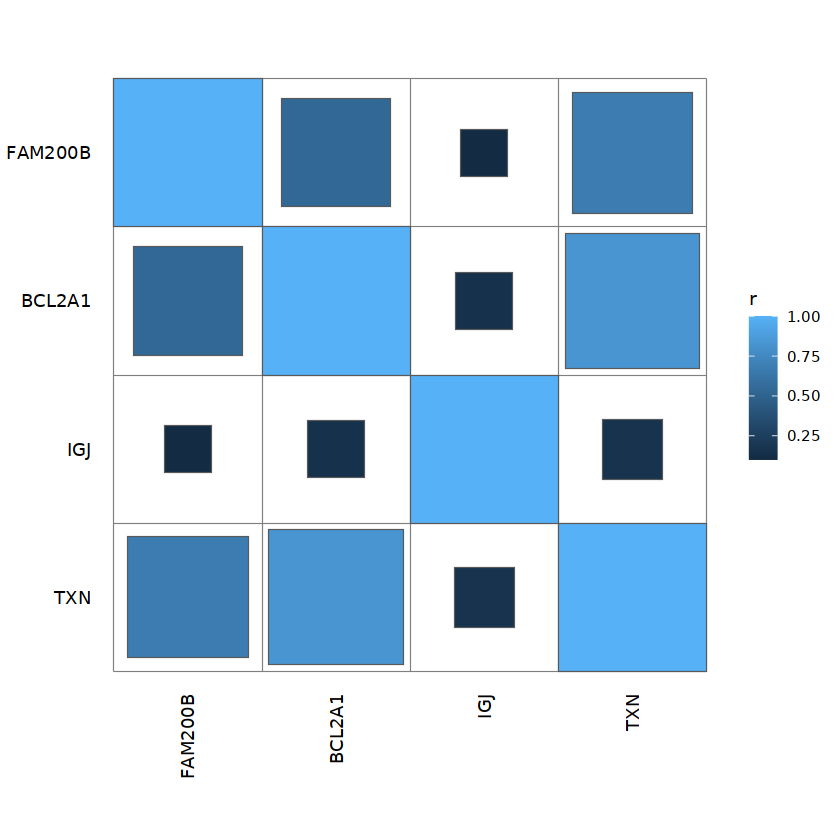

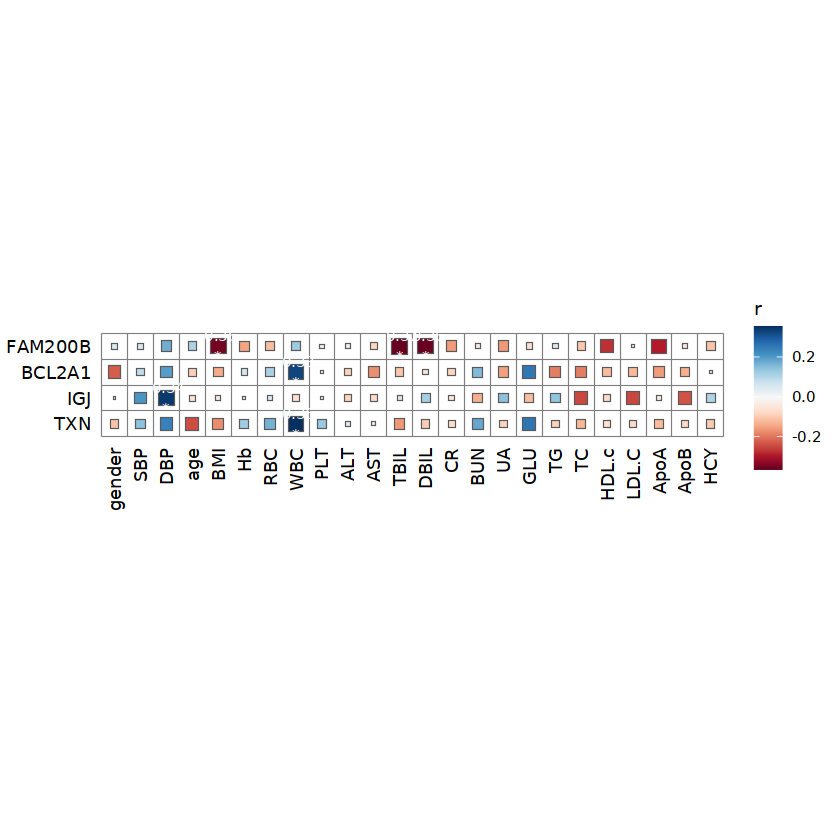

In [66]:
matrix_data(list(cli = gene)) %>% 
  as_md_tbl()
correlate(gene) %>% 
  as_matrix_data()
correlate(gene) %>% 
  as_md_tbl()

correlate(gene) %>% 
  as_md_tbl() %>% 
  qcorrplot() +
  geom_square()

#

library(vegan)

library(ggplot2)

correlate( gene,cli, method = "pearson") %>% 
  qcorrplot() +
  geom_square() +
  geom_mark(sep = '\n',size = 3, sig_level = c(0.05, 0.01, 0.001),
            sig_thres = 0.05, color = 'white') + #
  scale_fill_gradientn(colours = RColorBrewer::brewer.pal(11, "RdBu"))


In [67]:
colnames(gene)

[1] "FAM200B" "BCL2A1"  "IGJ"     "TXN"

In [68]:
library(dplyr)
mantel <- mantel_test(gene,cli, 
                      spec_select = list(FAM200B= 1,BCL2A1=2,IGJ=3,TXN=4))%>% 
  mutate(rd = cut(r, breaks = c(-Inf,  0.3, Inf),
                  labels = c("< 0.2", ">= 0.2")),
         pd = cut(p, breaks = c(-Inf, 0.01, 0.05, Inf),
                  labels = c("< 0.01", "0.01 - 0.05", ">= 0.05")))

`mantel_test()` using 'bray' dist method for 'spec'.

`mantel_test()` using 'euclidean' dist method for 'env'.



In [69]:
pdf('./fig.re//cor.env.pdf',width = 8,height = 7)
qcorrplot(correlate(cli), type = "lower", diag = FALSE) +  geom_square() +geom_mark(sep = '\n',size = 1.8, sig_level = c(0.05, 0.01, 0.001),
    sig_thres = 0.05,color="white") +
  geom_couple(aes(colour = pd, size = rd), 
              data = mantel, 
              curvature = nice_curvature()) +
  scale_fill_gradientn(colours = RColorBrewer::brewer.pal(11, "RdBu")) +
  scale_size_manual(values = c(0.5, 1, 2)) +
  scale_colour_manual(values = color_pal(3)) +
  guides(size = guide_legend(title = "Mantel's r",
                             override.aes = list(color = "black"), 
                             order = 2),
         colour = guide_legend(title = "Mantel's p", 
                               override.aes = list(size = 3), 
                               order = 1),
         fill = guide_colorbar(title = "Pearson's r", order = 3))
dev.off()

png 
  2

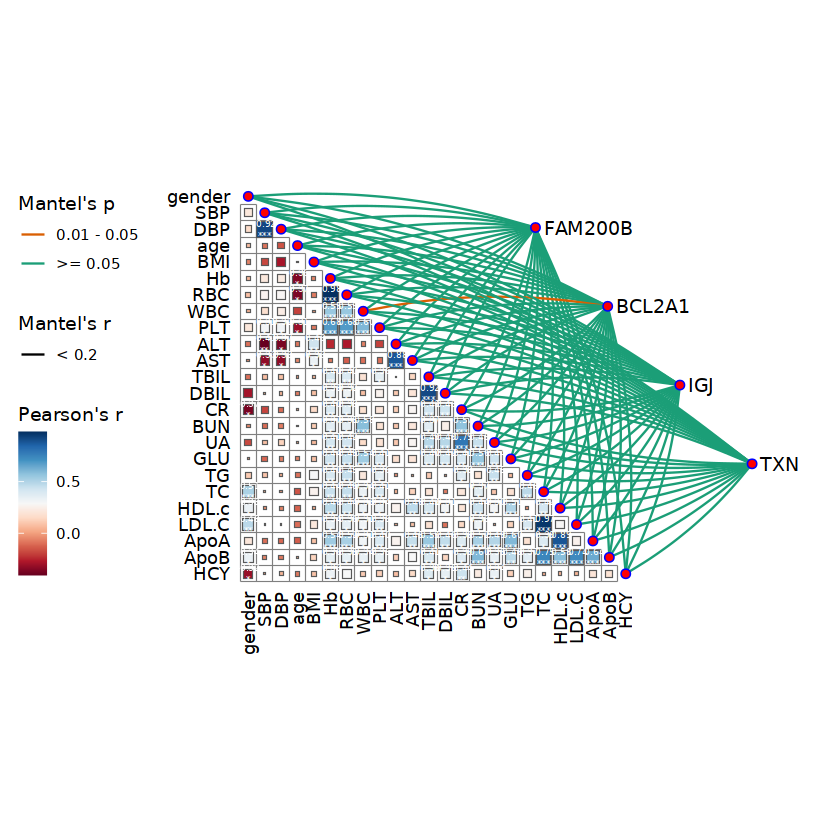

In [70]:
qcorrplot(correlate(cli), type = "lower", diag = FALSE) +  geom_square() +geom_mark(sep = '\n',size = 1.8, sig_level = c(0.05, 0.01, 0.001),
    sig_thres = 0.05,color="white") +
  geom_couple(aes(colour = pd, size = rd), 
              data = mantel, 
              curvature = nice_curvature()) +
  scale_fill_gradientn(colours = RColorBrewer::brewer.pal(11, "RdBu")) +
  scale_size_manual(values = c(0.5, 1, 2)) +
  scale_colour_manual(values = color_pal(3)) +
  guides(size = guide_legend(title = "Mantel's r",
                             override.aes = list(color = "black"), 
                             order = 2),
         colour = guide_legend(title = "Mantel's p", 
                               override.aes = list(size = 3), 
                               order = 1),
         fill = guide_colorbar(title = "Pearson's r", order = 3))

In [71]:
cor_res <- correlate(cli, gene,method = "pearson")

In [72]:
library(tidyr)
library(tibble)

Warning message:
"package 'tibble' was built under R version 4.2.3"


In [73]:
df_r <- cor_res$r %>% 
  as.data.frame() %>% 
  rownames_to_column(var = "gene") 
df_p <- cor_res$p %>% 
  as.data.frame() %>% 
  rownames_to_column(var = "gene") 

In [74]:
write.csv(df_r,file = './fig.re//r.csv')

In [75]:
write.csv(df_p,file = './fig.re//p.csv')

In [76]:
getwd()

[1] "/data/import/project1/momo-6.12.0.199/runtime/PIPELINE/taxonkit1/a.ji/data2"